In [28]:
import sys
sys.path.append("module/") #add path for import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
import tigress_read

In [2]:
dir_master = "/projects/EOSTRIKE/COinTIGRESS/"
lines = [1, 2] 
R2B2_Z1 = tigress_read.load("R2B2-Z1", lines, dir_master)
R4_Z1 = tigress_read.load("R4-Z1", lines, dir_master)
R8_Z1 = tigress_read.load("R8-Z1", lines, dir_master)

In [3]:
ds_R2B2 = R2B2_Z1.get_data(56)
ds_R4 = R4_Z1.get_data(90)
ds_R8 = R8_Z1.get_data(390)

In [10]:
extent_R2 = [-0.256, 0.256, -0.256, 0.256]
extent_R4 = [-0.256, 0.256, -0.256, 0.256]
extent_R8 = [-0.512, 0.512, -0.512, 0.512]

In [24]:
def rescale_WCO(ds, iline, pixel_size_pc):
    factor = int(round(pixel_size_pc/ds.dx_pc))
    nx = ds.radmc[iline].img.nx
    ny = ds.radmc[iline].img.ny
    WCO = ds.radmc[iline].WCO
    WCO_rescale = WCO.reshape((int(nx/factor), factor, int(ny/factor), factor)).mean(3).mean(1)
    return WCO_rescale

WCO_R2B2_32 = rescale_WCO(ds_R2B2, 1, 32)
WCO_R4_32 = rescale_WCO(ds_R4, 1, 32)
WCO_R8_32 = rescale_WCO(ds_R8, 1, 32)
WCO_R2B2_128 = rescale_WCO(ds_R2B2, 1, 128)
WCO_R4_128 = rescale_WCO(ds_R4, 1, 128)
WCO_R8_128 = rescale_WCO(ds_R8, 1, 128)

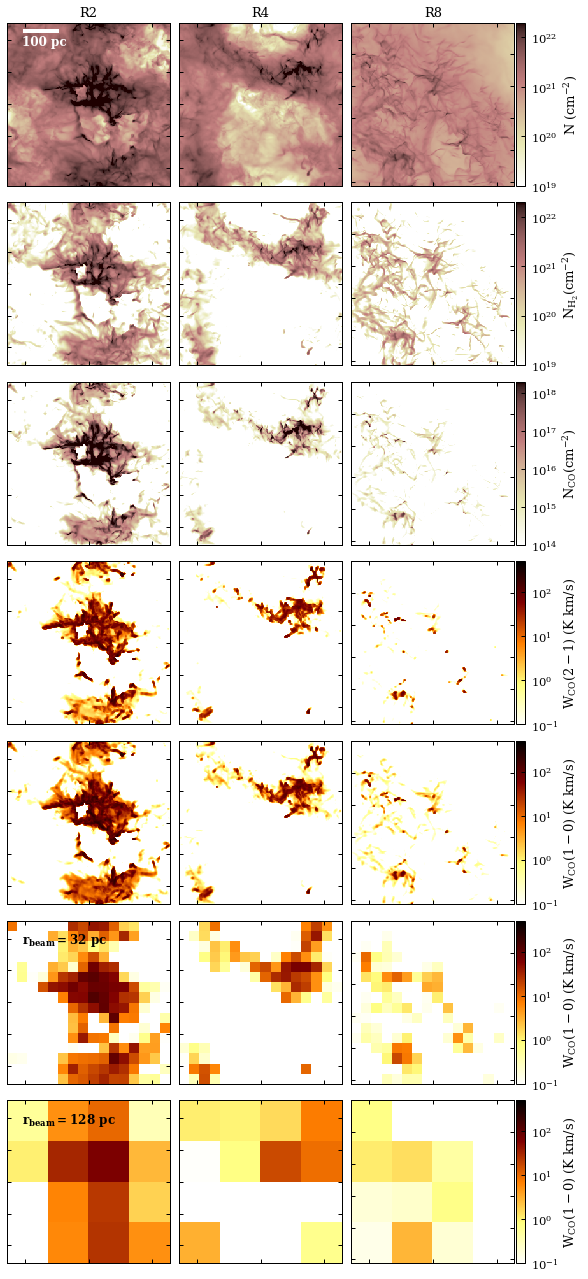

In [26]:
fig  = plt.figure(figsize=[8.1, 17.6])
gs = gridspec.GridSpec(7, 4, height_ratios=[1, 1, 1, 1, 1, 1, 1], width_ratios=[1, 1, 1, 0.05], wspace=0.2)
#NH
ax00 = fig.add_subplot(gs[0, 0], aspect="equal")
ax01 = fig.add_subplot(gs[0, 1], aspect="equal")
ax02 = fig.add_subplot(gs[0, 2], aspect="equal")
ax0_cbar = fig.add_subplot(gs[0, 3])
keys_NH = {"origin":"lower", "cmap":"pink_r", "vmin":1e19, "vmax":2e22, "norm": LogNorm()}
cax0 = ax00.imshow(np.swapaxes(ds_R2B2.NH, 0, 1), extent=extent_R2, **keys_NH)
cax0 = ax01.imshow(np.swapaxes(ds_R4.NH, 0, 1), extent=extent_R4, **keys_NH)
cax0 = ax02.imshow(np.swapaxes(ds_R8.NH, 0, 1), extent=extent_R8, **keys_NH)
ax00.plot([-0.2, -0.1], [0.23, 0.23], linewidth=4, color="white")
ax00.text(-0.21, 0.185, "100 pc", color="white", weight='bold', fontsize=12)
cbar0=fig.colorbar(cax0, cax=ax0_cbar)
cbar0.set_label(r"$N\ (\mathrm{cm^{-2}})$")
#NH2
ax10 = fig.add_subplot(gs[1, 0], aspect="equal")
ax11 = fig.add_subplot(gs[1, 1], aspect="equal")
ax12 = fig.add_subplot(gs[1, 2], aspect="equal")
ax1_cbar = fig.add_subplot(gs[1, 3])
cax1 = ax10.imshow(np.swapaxes(ds_R2B2.NH2, 0, 1), extent=extent_R2, **keys_NH)
cax1 = ax11.imshow(np.swapaxes(ds_R4.NH2, 0, 1), extent=extent_R4, **keys_NH)
cax1 = ax12.imshow(np.swapaxes(ds_R8.NH2, 0, 1), extent=extent_R8, **keys_NH)
cbar1=fig.colorbar(cax1, cax=ax1_cbar)
cbar1.set_label(r"$N_{H_2} (\mathrm{cm^{-2}})$")
#NCO
ax20 = fig.add_subplot(gs[2, 0], aspect="equal")
ax21 = fig.add_subplot(gs[2, 1], aspect="equal")
ax22 = fig.add_subplot(gs[2, 2], aspect="equal")
ax2_cbar = fig.add_subplot(gs[2, 3])
keys_NCO = {"origin":"lower", "cmap":"pink_r", "vmin":1e14, "vmax":2e18, "norm": LogNorm()}
cax2 = ax20.imshow(np.swapaxes(ds_R2B2.NCO, 0, 1), extent=extent_R2, **keys_NCO)
cax2 = ax21.imshow(np.swapaxes(ds_R4.NCO, 0, 1), extent=extent_R4, **keys_NCO)
cax2 = ax22.imshow(np.swapaxes(ds_R8.NCO, 0, 1), extent=extent_R8, **keys_NCO)
cbar2=fig.colorbar(cax2, cax=ax2_cbar)
cbar2.set_label(r"$N_{CO} (\mathrm{cm^{-2}})$")
#WCO(2-1)
ax30 = fig.add_subplot(gs[3, 0], aspect="equal")
ax31 = fig.add_subplot(gs[3, 1], aspect="equal")
ax32 = fig.add_subplot(gs[3, 2], aspect="equal")
ax3_cbar = fig.add_subplot(gs[3, 3])
keys_WCO = {"origin":"lower", "cmap":"afmhot_r", "vmin":0.1, "vmax":500, "norm": LogNorm()}
cax3 = ax30.imshow(np.swapaxes(ds_R2B2.radmc[2].WCO, 0, 1), extent=extent_R2, **keys_WCO)
cax3 = ax31.imshow(np.swapaxes(ds_R4.radmc[2].WCO, 0, 1), extent=extent_R4, **keys_WCO)
cax3 = ax32.imshow(np.swapaxes(ds_R8.radmc[2].WCO, 0, 1), extent=extent_R8, **keys_WCO)
cbar3=fig.colorbar(cax3, cax=ax3_cbar)
cbar3.set_label(r"$W_{CO}(2-1)\ (K\ km/s)$")
#WCO(1-0)
ax40 = fig.add_subplot(gs[4, 0], aspect="equal")
ax41 = fig.add_subplot(gs[4, 1], aspect="equal")
ax42 = fig.add_subplot(gs[4, 2], aspect="equal")
ax4_cbar = fig.add_subplot(gs[4, 3])
keys_WCO = {"origin":"lower", "cmap":"afmhot_r", "vmin":0.1, "vmax":500, "norm": LogNorm()}
cax4 = ax40.imshow(np.swapaxes(ds_R2B2.radmc[1].WCO, 0, 1), extent=extent_R2, **keys_WCO)
cax4 = ax41.imshow(np.swapaxes(ds_R4.radmc[1].WCO, 0, 1), extent=extent_R4, **keys_WCO)
cax4 = ax42.imshow(np.swapaxes(ds_R8.radmc[1].WCO, 0, 1), extent=extent_R8, **keys_WCO)
cbar4=fig.colorbar(cax4, cax=ax4_cbar)
cbar4.set_label(r"$W_{CO}(1-0)\ (K\ km/s)$")
#WCO(1-0), rbeam=32pc
ax50 = fig.add_subplot(gs[5, 0], aspect="equal")
ax51 = fig.add_subplot(gs[5, 1], aspect="equal")
ax52 = fig.add_subplot(gs[5, 2], aspect="equal")
ax5_cbar = fig.add_subplot(gs[5, 3])
keys_WCO = {"origin":"lower", "cmap":"afmhot_r", "vmin":0.1, "vmax":500, "norm": LogNorm()}
cax5 = ax50.imshow(np.swapaxes(WCO_R2B2_32, 0, 1), extent=extent_R2, **keys_WCO)
cax5 = ax51.imshow(np.swapaxes(WCO_R4_32, 0, 1), extent=extent_R4, **keys_WCO)
cax5 = ax52.imshow(np.swapaxes(WCO_R8_32, 0, 1), extent=extent_R8, **keys_WCO)
ax50.text(-0.21, 0.185, "$r_{beam}=32\ pc$", color="k", weight='bold', fontsize=12)
cbar5=fig.colorbar(cax5, cax=ax5_cbar)
cbar5.set_label(r"$W_{CO}(1-0)\ (K\ km/s)$")
#WCO(1-0), rbeam=128pc
ax60 = fig.add_subplot(gs[6, 0], aspect="equal")
ax61 = fig.add_subplot(gs[6, 1], aspect="equal")
ax62 = fig.add_subplot(gs[6, 2], aspect="equal")
ax6_cbar = fig.add_subplot(gs[6, 3])
keys_WCO = {"origin":"lower", "cmap":"afmhot_r", "vmin":0.1, "vmax":500, "norm": LogNorm()}
cax6 = ax60.imshow(np.swapaxes(WCO_R2B2_128, 0, 1), extent=extent_R2, **keys_WCO)
cax6 = ax61.imshow(np.swapaxes(WCO_R4_128, 0, 1), extent=extent_R4, **keys_WCO)
cax6 = ax62.imshow(np.swapaxes(WCO_R8_128, 0, 1), extent=extent_R8, **keys_WCO)
ax60.text(-0.21, 0.185, "$r_{beam}=128\ pc$", color="k", weight='bold', fontsize=12)
cbar6=fig.colorbar(cax6, cax=ax6_cbar)
cbar6.set_label(r"$W_{CO}(1-0)\ (K\ km/s)$")
#axes setting
for ax in [ax00, ax01, ax02, ax10, ax11, ax12,
           ax20, ax21, ax22, ax30, ax31, ax32,
           ax40, ax41, ax42, ax50, ax51, ax52,
           ax60, ax61, ax62]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(size=4)
    ax.minorticks_off()
for ax in [ax02, ax12, ax22, ax32, ax42, ax52, ax62]:
    ax.set_xlim([-0.256, 0.256])
    ax.set_ylim([-0.512, 0])
for cb in [cbar0, cbar1, cbar2, cbar3, cbar4, cbar5, cbar6]:
    cb.ax.tick_params(size=4)
    cb.ax.minorticks_off()
ax00.set_title("R2")
ax01.set_title("R4")
ax02.set_title("R8")
gs.tight_layout(fig, pad=0.1)